In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequalityN.csv")

### Let's get general information about our data

In [3]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.duplicated().sum()

1168

### Here we can see that the target's distribution of our data is not balanced and there are nulls and duplicates in different features

In [7]:
import matplotlib.pyplot as plt

### Let's see visualizations of  distribution for each features and target  distribution depand on type

<AxesSubplot:>

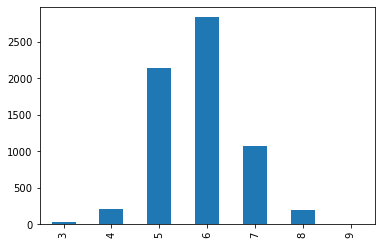

In [8]:
df['quality'].value_counts().sort_index().plot.bar()

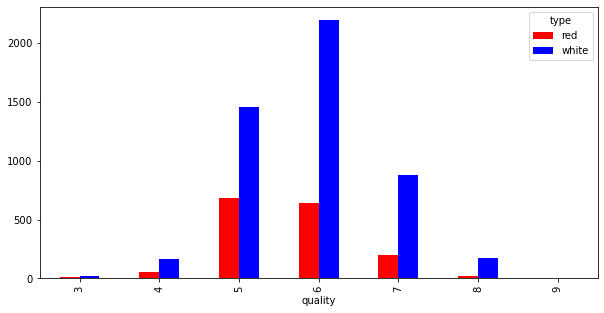

In [9]:
pd.crosstab(df["quality"], df['type']).plot(kind="bar", figsize=(10,5), color=["r", "b"]);

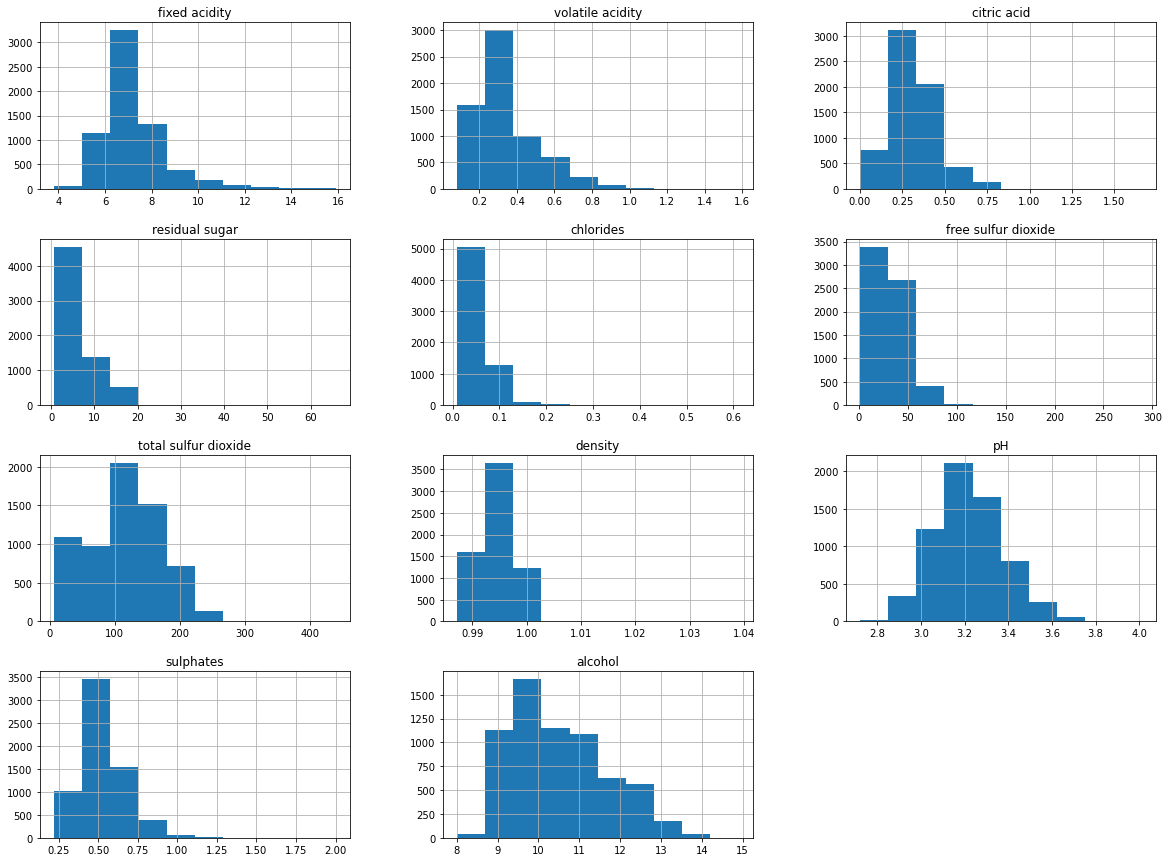

In [10]:
df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
    'total sulfur dioxide','density','pH','sulphates','alcohol']].hist(figsize=(20,15));

### Let's also check correlations 

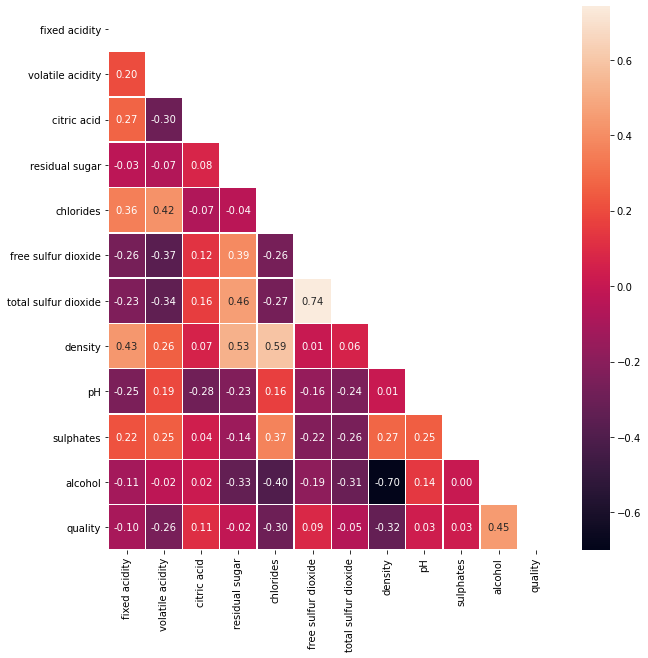

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
zeromask = np.zeros_like(df.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'),
            annot=True,
            linewidths=0.5,
            mask=zeromask,
            fmt= ".2f");

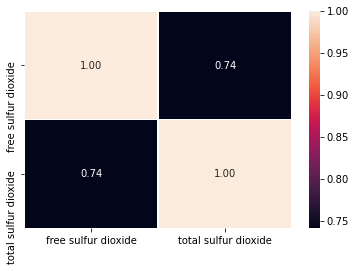

In [12]:
sns.heatmap(df[['free sulfur dioxide', 'total sulfur dioxide']].corr(method='spearman'), 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f");

### As you can see there is high correlation between 'free sulfur dioxide' and 'total sulfur dioxide' 

### Let's see also target distribution visualizations depand on each features with interactive ploting

In [13]:
from ipywidgets import interact, IntSlider, RadioButtons
import matplotlib.pyplot as plt
import seaborn as sns

def plot_each_feature(feature='alcohol'):    

    plt.figure(figsize=(7,3))
    plt.scatter(df['quality'], df[feature])
    plt.title(feature)
    plt.show()
interact(plot_each_feature, feature=RadioButtons(options=['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'type', 'volatile acidity'],
    description='Feauters:',
    disabled=False
));

interactive(children=(RadioButtons(description='Feauters:', options=('alcohol', 'chlorides', 'citric acid', 'd…

In [14]:
def boxplot_each_feature(feature='alcohol'):    
    
    plt.figure(figsize=(7,3))
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()
interact(boxplot_each_feature, feature=RadioButtons(options=['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity'],
    description='Feauters:',
    disabled=False
));

interactive(children=(RadioButtons(description='Feauters:', options=('alcohol', 'chlorides', 'citric acid', 'd…

In [15]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


### Our hypothesis for solving classification problem with 3 classes, where (3, 4) -> low quality, (5, 6, 7) -> medium quality and (8, 9)-> high quality.
1. We will use all features in modeling step

    -Fillna process with median strategy
    
    -StandardScaler process
    
    -OneHotEncoder process for categoric feature
    
    -Label transformation from int to categoric
    

In [16]:
categoric_features = ['type']
numeric_features = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
           'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
           'total sulfur dioxide', 'volatile acidity']

### Now let's do some changes with our data

1.Make X features and y label

2.Fillna process (We have nulls only in numeric features and will use the MEDIAN strategy for not changing ditribution)

3.Scale process (We will use the StandardScaler strategy)

4.OneHotEncoder process for categoric feature

5.Spliting data for modeling step (X_train, X_test, y_train, y_test)

### We will use 4 models for classification problem(LogisticRegression, KNeighborsClassifier, RandomForestClassifier, svm)

In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  precision_score, confusion_matrix, classification_report, multilabel_confusion_matrix

In [33]:
df['quality'] = df['quality'].apply(lambda x: "low" if x <= 4 else ('medium' if x <= 7  else 'high'))

In [34]:
X = df[df.columns.difference(['quality'])]
y = df['quality']

In [35]:
df.columns.difference(['quality'])

Index(['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'type', 'volatile acidity'],
      dtype='object')

In [36]:
X.shape, y.shape

((6497, 12), (6497,))

In [37]:
def castom_StandardScaler_One_Hot_Encoder(X, numeric_features = [], categoric_features = []):
    """
    This function takes data, numeric_features[list] and categoric_features[list] and returns changed data.
    
    For numeric_features: Data -> Fillna(SimpleImputer(strategy='mean')) -> Scale(StandardScaler) -> Data
    
    For categoric_features: Data -> OneHotEncoder -> Data
    
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.impute import SimpleImputer
    import numpy as np
    import pandas as pd
    if numeric_features and categoric_features:
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='median').fit(X[numeric_features])
        X[numeric_features] = imp_mean.transform(X[numeric_features])
        
        scale = StandardScaler().fit(X[numeric_features])
        newX = scale.transform(X[numeric_features])
        X_scaled = pd.DataFrame(newX, columns = numeric_features)
        X_hot = pd.get_dummies(X[categoric_features])
        
        return pd.concat([X_hot, X_scaled], axis = 1)
    
    elif numeric_features and not categoric_features:
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='median').fit(X[numeric_features])
        X[numeric_features] = imp_mean.transform(X[numeric_features])
        
        scale = StandardScaler().fit(X[numeric_features])
        newX = scale.transform(X[numeric_features])
        X_scaled = pd.DataFrame(newX, columns = numeric_features)
        
        return pd.concat([X[X.columns.difference(numeric_features)], X_scaled], axis = 1)
    
    elif categoric_features and not numeric_features:
        X_hot = pd.get_dummies(X[categoric_features])
        
        return pd.concat([X[X.columns.difference(categoric_features)], X_hot], axis = 1) 
    
    return X
        
        

In [38]:
X = castom_StandardScaler_One_Hot_Encoder(X, numeric_features = numeric_features, categoric_features = categoric_features)

In [39]:
X.shape

(6497, 13)

In [40]:
X.head(2)

,type_red,type_white,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,0,1,-1.418558,-0.315139,0.284273,2.102214,-0.166898,0.815565,-1.359590,3.207005,-0.545868,0.959976,-0.423168
1,0,1,-0.831615,-0.200946,0.146551,-0.232332,-0.707155,-0.931107,0.508116,-0.807946,-0.276974,0.287618,-0.240846


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_red              6497 non-null   uint8  
 1   type_white            6497 non-null   uint8  
 2   alcohol               6497 non-null   float64
 3   chlorides             6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   density               6497 non-null   float64
 6   fixed acidity         6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   residual sugar        6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  total sulfur dioxide  6497 non-null   float64
 12  volatile acidity      6497 non-null   float64
dtypes: float64(11), uint8(2)
memory usage: 571.2 KB


In [42]:
X.shape, y.shape

((6497, 13), (6497,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [44]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [46]:
def roc_aux_plot(model, X, y):
    
    """
    This  function takes model, X data and y label and returns ROC AUX metrics and draws for each classes
    """
    
    y = label_binarize(y, classes=['low', 'medium', 'high'])
    n_classes = y.shape[1]
    
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    X = np.c_[X, random_state.randn(n_samples, n_features)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0, stratify = y)
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    lw = 2
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'r', 'b', 'brown', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+3, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUX for multi-class by using {model}')
    plt.legend(loc="lower right")
    plt.show()

In [47]:
score = 0
final_model = None
best_grid_search = None

In [48]:
# LogisticRegression
lr = LogisticRegression(random_state=1)
param_grid_lr = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20)}
grid_search_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv = 5)
grid_search_lr.fit(X_train, y_train)
if grid_search_lr.best_score_ > score:
    score = grid_search_lr.best_score_
    final_model = lr
    best_grid_search = grid_search_lr
pred_y_test_lr = grid_search_lr.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        40
         low       0.00      0.00      0.00        49
      medium       0.93      1.00      0.96      1211

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300

[[[1260    0]
  [  40    0]]

 [[1251    0]
  [  49    0]]

 [[   0   89]
  [   0 1211]]]
0.9318838380099208 0.9318838380099208


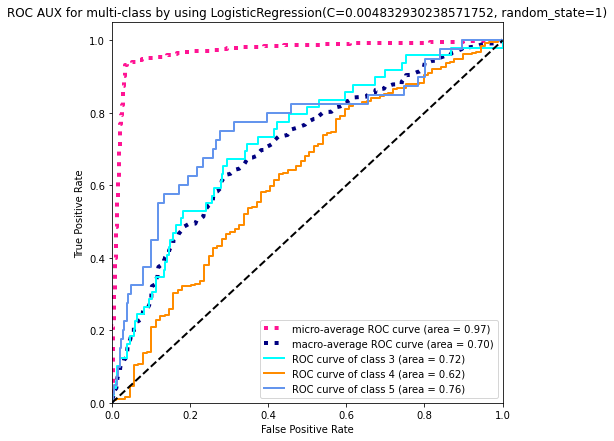

In [49]:
print(classification_report( y_test, pred_y_test_lr))
print(multilabel_confusion_matrix( y_test, pred_y_test_lr))
print(grid_search_lr.best_score_, score)
roc_aux_plot(grid_search_lr.best_estimator_, X, y)

In [50]:
# KNN
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(3, 30)}
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv = 5)
grid_search_knn.fit(X_train, y_train)
if grid_search_knn.best_score_ > score:
    score = grid_search_knn.best_score_
    final_model = knn
    best_grid_search = grid_search_knn
pred_y_test_knn = grid_search_knn.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        40
         low       0.00      0.00      0.00        49
      medium       0.93      1.00      0.96      1211

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300

[[[1260    0]
  [  40    0]]

 [[1251    0]
  [  49    0]]

 [[   0   89]
  [   0 1211]]]
0.9318838380099208 0.9318838380099208


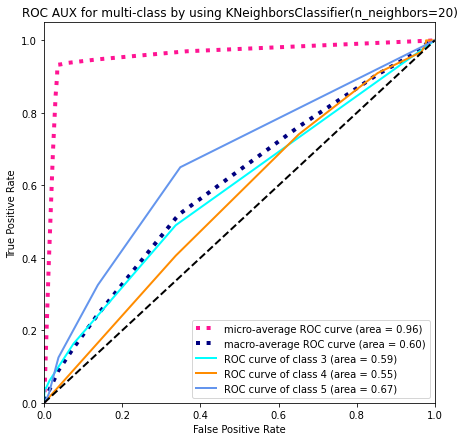

In [51]:
print(classification_report(y_test, pred_y_test_knn))
print(multilabel_confusion_matrix(y_test, pred_y_test_knn))
print(grid_search_knn.best_score_, score)
roc_aux_plot(grid_search_knn.best_estimator_, X, y)

In [52]:
# RandomForest
rf = RandomForestClassifier(n_estimators = 40, random_state=0)
param_grid_rf = {'max_depth': range(2, 9), 'min_samples_split': range(2, 11, 2)}
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv = 5)
grid_search_rf.fit(X_train, y_train)
if grid_search_rf.best_score_ > score:
    score = grid_search_rf.best_score_
    final_model = rf
    best_grid_search = grid_search_rf
pred_y_test_rf = grid_search_rf.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        40
         low       0.00      0.00      0.00        49
      medium       0.93      1.00      0.96      1211

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300

[[[1260    0]
  [  40    0]]

 [[1251    0]
  [  49    0]]

 [[   0   89]
  [   0 1211]]]
0.9318836529207077 0.9318838380099208


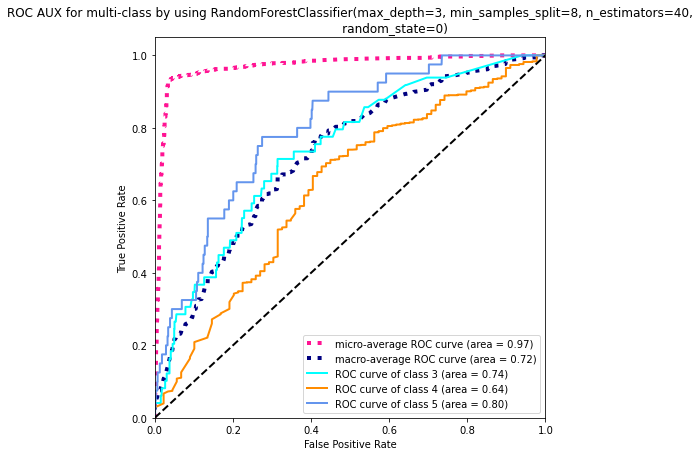

In [53]:
print(classification_report(y_test, pred_y_test_rf))
print(multilabel_confusion_matrix(y_test, pred_y_test_rf))
print(grid_search_rf.best_score_, score)
roc_aux_plot(grid_search_rf.best_estimator_, X, y)

In [56]:
# SVM
svm_model = svm.SVC(random_state=0, probability=True)
param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : np.arange(-1, 1, 0.2)}
grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, cv = 5)
grid_search_svm.fit(X_train, y_train)
if grid_search_svm.best_score_ > score:
    score = grid_search_svm.best_score_
    final_model = svm_model
    best_grid_search = grid_search_svm
pred_y_test_svm = grid_search_svm.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        40
         low       0.00      0.00      0.00        49
      medium       0.93      1.00      0.96      1211

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300

[[[1260    0]
  [  40    0]]

 [[1251    0]
  [  49    0]]

 [[   0   89]
  [   0 1211]]]
0.9316915303176131 0.9318838380099208


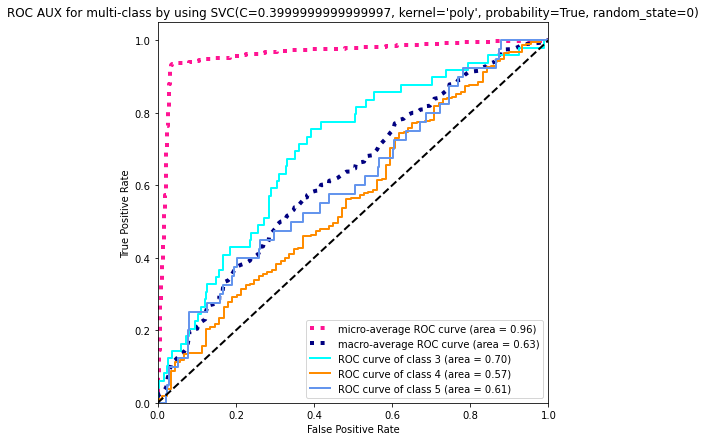

In [57]:
print(classification_report(y_test, pred_y_test_svm))
print(multilabel_confusion_matrix(y_test, pred_y_test_svm))
print(grid_search_svm.best_score_, score)
roc_aux_plot(grid_search_svm.best_estimator_, X, y)

### As we can see the best model for this problem is RandomForestClassifier.It has  best score and best macro-average ROC curve.

In [60]:
best_grid_search = grid_search_rf

In [61]:
best_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=0),
             param_grid={'max_depth': range(2, 9),
                         'min_samples_split': range(2, 11, 2)})

In [62]:
Y_predict_test = best_grid_search.best_estimator_.predict(X_test)

In [63]:
Y_predict_train = best_grid_search.best_estimator_.predict(X_train)

In [64]:
best_grid_search.score(X_train, y_train)

0.9316913604002309

In [65]:
best_grid_search.score(X_test, y_test)

0.9315384615384615

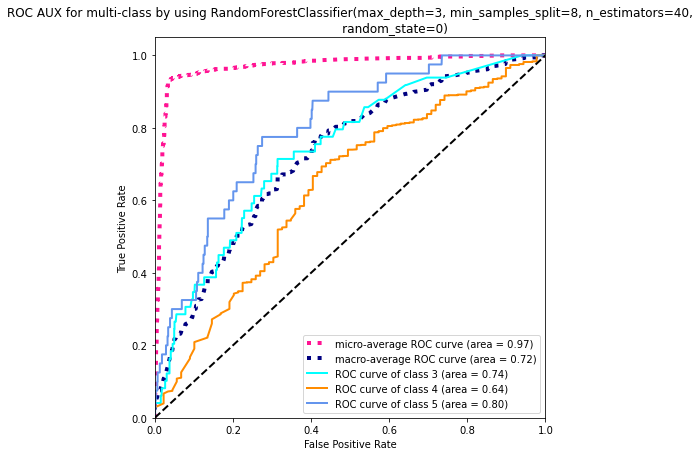

None


In [66]:
print(roc_aux_plot(best_grid_search.best_estimator_, X, y))

In [67]:
print(classification_report(Y_predict_test, y_test))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         0
         low       0.00      0.00      0.00         0
      medium       1.00      0.93      0.96      1300

    accuracy                           0.93      1300
   macro avg       0.33      0.31      0.32      1300
weighted avg       1.00      0.93      0.96      1300



In [68]:
print(classification_report(Y_predict_train, y_train))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         0
         low       0.00      0.00      0.00         0
      medium       1.00      0.93      0.96      5197

    accuracy                           0.93      5197
   macro avg       0.33      0.31      0.32      5197
weighted avg       1.00      0.93      0.96      5197



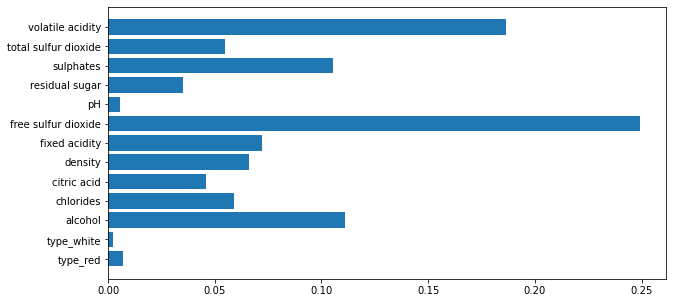

In [69]:
plt.figure(figsize=(10, 5))
plt.barh(X.columns, best_grid_search.best_estimator_.feature_importances_)
plt.show()

In [70]:
best_grid_search.best_params_

{'max_depth': 3, 'min_samples_split': 8}

In [71]:
X_test.head(2)

,type_red,type_white,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
2615,0,1,-0.160823,-0.486429,0.628577,0.694816,-0.552796,0.928254,0.383603,1.840661,1.269163,0.234537,-0.970134
6045,1,0,1.096912,0.427118,0.904021,0.774858,2.148490,-1.381861,-0.052195,0.159006,-0.276974,-1.800231,0.427667


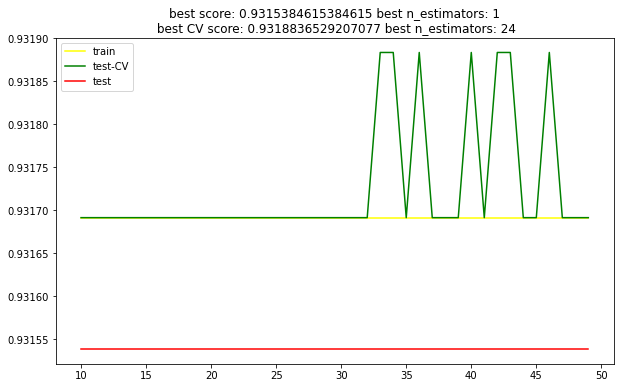

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

n_estimators = range(10,50)

recall_cv = []
recall_test = []
recall_train = []

for i in n_estimators:
    rfc = RandomForestClassifier(n_estimators=i, max_depth = 3, min_samples_split = 8, random_state=0).fit(X_train,y_train)    
    recall_cv.append(np.mean(cross_val_score(rfc, X_train, y_train, scoring='recall_weighted', cv=5)))
    recall_test.append(recall_score(rfc.predict(X_test), y_test, average='weighted'))
    recall_train.append(recall_score(rfc.predict(X_train),y_train, average='weighted'))
    
plt.figure(figsize=(10, 6))    
plt.plot(n_estimators, recall_train, "yellow", label="train")
plt.plot(n_estimators, recall_cv, "green", label="test-CV")
plt.plot(n_estimators, recall_test, "red", label="test")
plt.title(f"best score: {max(recall_test)} best n_estimators: {np.argmax(recall_test)+1}\n best CV score: {max(recall_cv)} best n_estimators: {np.argmax(recall_cv)+1}")
plt.legend()
plt.show()

In [73]:
model = RandomForestClassifier(n_estimators=34, max_depth = 8, min_samples_split = 2, random_state=0).fit(X_train,y_train)

In [74]:
y_pred_test = model.predict(X_test)

In [75]:
y_pred_train = model.predict(X_train)

In [76]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        40
         low       0.00      0.00      0.00        49
      medium       0.93      1.00      0.96      1211

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300



In [77]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

        high       1.00      0.02      0.04       158
         low       1.00      0.18      0.31       197
      medium       0.94      1.00      0.97      4842

    accuracy                           0.94      5197
   macro avg       0.98      0.40      0.44      5197
weighted avg       0.94      0.94      0.92      5197



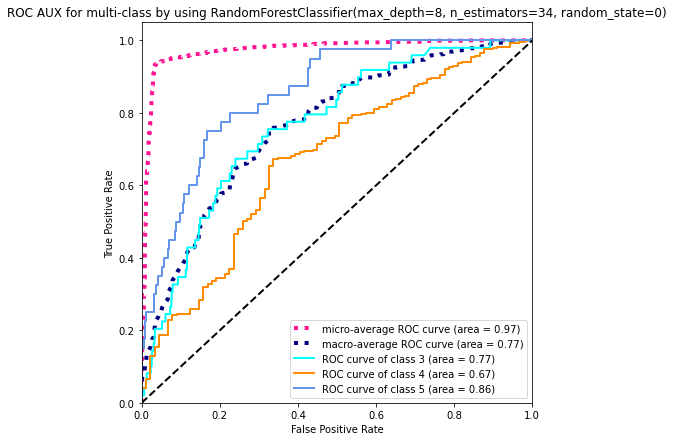

In [78]:
roc_aux_plot(model, X, y)

### Let's also check the model's dependance from the numbers of elements of our data

In [79]:
from sklearn.model_selection import learning_curve

In [80]:
def plot_learning_curve(model, X, y):
    """
    This function takes model, data and label and returns the graph of learning curve 
    for each class for training and validation set
    
    """
    N_train, val_train, val_test = learning_curve(model,
    X, y, train_sizes = np.linspace(0.05, 1, 20))
    
    plt.figure(figsize=(10, 10))
    plt.plot(N_train, val_train, label='training scores')
    plt.plot(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()


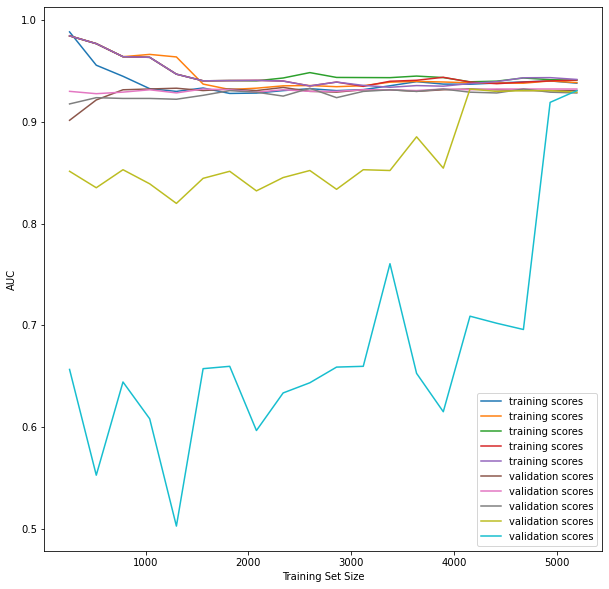

In [81]:
plot_learning_curve(model, X, y)